<a href="https://colab.research.google.com/github/stefanciprian/rd/blob/main/vix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIX Tests

This Jupyter Notebook is dedicated to VIX CBOE Volatility Index and related stuff VIXL.L and so on.

# VIX Days between spikes

In [ ]:
!pip install pandas numpy matplotlib yfinance

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^VIX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Series([], Name: Date, dtype: int64)
Average number of days between significant VIX spikes: nan


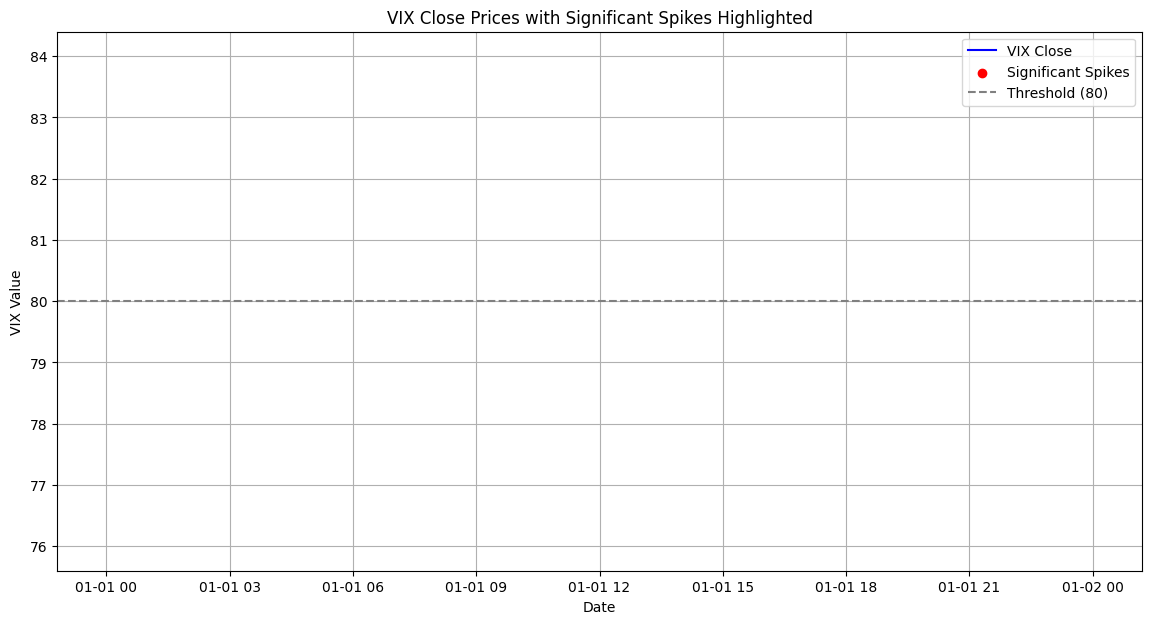

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

end = datetime.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2000-11-13', end=end)

# Define the threshold for significant spikes
threshold = 80

# Identify dates where VIX exceeds the threshold
spike_dates = vix_data[vix_data['Close'] > threshold].index

# Calculate the number of days between consecutive spikes
days_between_spikes = spike_dates.to_series().diff().dt.days.dropna()

print(days_between_spikes)

# Calculate the average number of days between spikes
average_days_between_spikes = days_between_spikes.mean()
print(f'Average number of days between significant VIX spikes: {average_days_between_spikes:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')
plt.scatter(spike_dates, vix_data.loc[spike_dates]['Close'], color='red', label='Significant Spikes')
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
plt.title('VIX Close Prices with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
<ipython-input-16-dcc9ca00e44f>:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_value = float(row['Close'])


Average number of days between significant VIX spikes: 23.07
Predicted next spike date relative to today: 2025-02-25


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


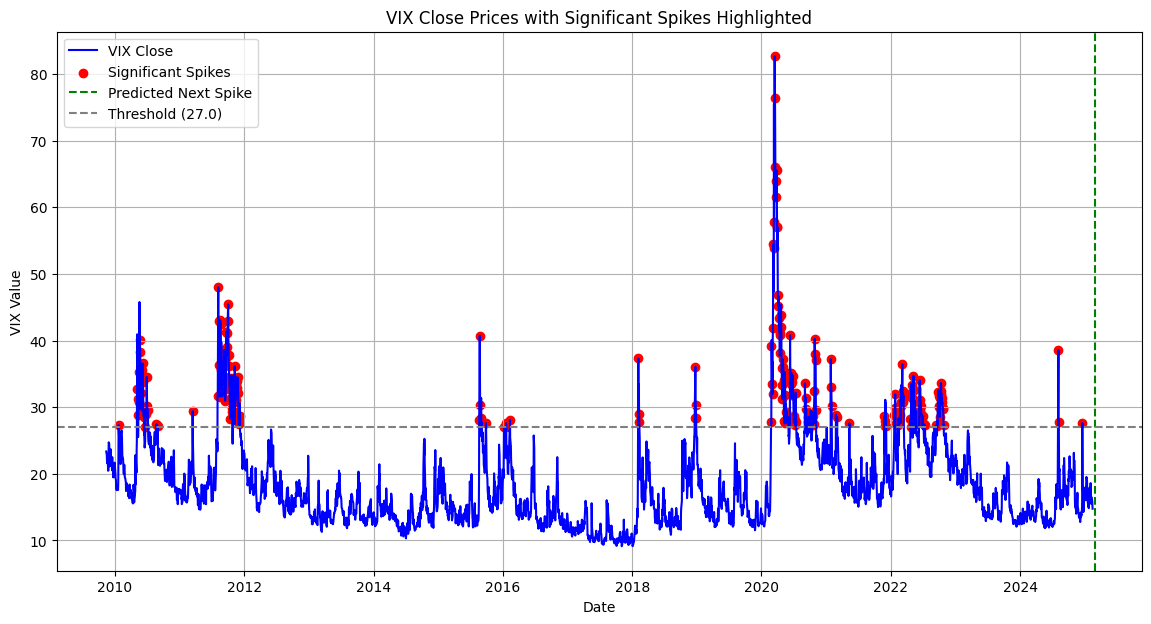

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import datetime

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2009-11-13', end=end_time)

# Define the threshold for significant spikes
threshold = 27.0

# Initialize list to collect spike dates
spike_dates = []

# Identify dates where VIX exceeds the threshold
for index, row in vix_data.iterrows():
    try:
        # Convert 'Close' value to float explicitly
        close_value = float(row['Close'])
        if close_value > threshold:
            # Append the date if 'Close' exceeds the threshold
            spike_dates.append(index)
    except (ValueError, TypeError) as e:
        print(f"Skipping row at index {index} due to conversion error: {e}")

# Remove consecutive spike dates (keep only the first in each streak)
unique_spike_dates = [spike_dates[0]] if spike_dates else []
for i in range(1, len(spike_dates)):
    if (spike_dates[i] - unique_spike_dates[-1]).days > 1:
        unique_spike_dates.append(spike_dates[i])

# Calculate days between consecutive unique spikes
days_between_spikes = [
    (unique_spike_dates[i] - unique_spike_dates[i - 1]).days
    for i in range(1, len(unique_spike_dates))
]

# Calculate average days between spikes
if days_between_spikes:
    average_days_between_spikes = sum(days_between_spikes) / len(days_between_spikes)
    print(f'Average number of days between significant VIX spikes: {average_days_between_spikes:.2f}')

    # Predict the next spike date relative to today
    today = pd.Timestamp(datetime.now()).tz_localize(None)
    last_spike_date = unique_spike_dates[-1].tz_localize(None)

    # Calculate the number of days since the last spike
    days_since_last_spike = (today - last_spike_date).days

    # Determine the next spike date
    if days_since_last_spike < average_days_between_spikes:
        # If we are still within the average interval, add the remaining days
        projected_days = average_days_between_spikes - days_since_last_spike
        next_spike_date = today + pd.Timedelta(days=projected_days)
    else:
        # If we've passed the interval, project the next spike based on multiples of the average
        cycles_passed = int(days_since_last_spike / average_days_between_spikes)
        next_spike_date = last_spike_date + pd.Timedelta(days=(cycles_passed + 1) * average_days_between_spikes)

    print(f'Predicted next spike date relative to today: {next_spike_date.date()}')
else:
    print(f"No significant spikes found for threshold {threshold}.")
    next_spike_date = None


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')

# Highlight the unique spike dates
if unique_spike_dates:
    plt.scatter(unique_spike_dates, [vix_data.loc[date]['Close'] for date in unique_spike_dates], color='red', label='Significant Spikes')

# Add predicted next spike date to the plot
if next_spike_date:
    plt.axvline(x=next_spike_date, color='green', linestyle='--', label='Predicted Next Spike')

plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
plt.title('VIX Close Prices with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()


# VIX Time Series with Highlighted Trend Changes

[*********************100%***********************]  1 of 1 completed


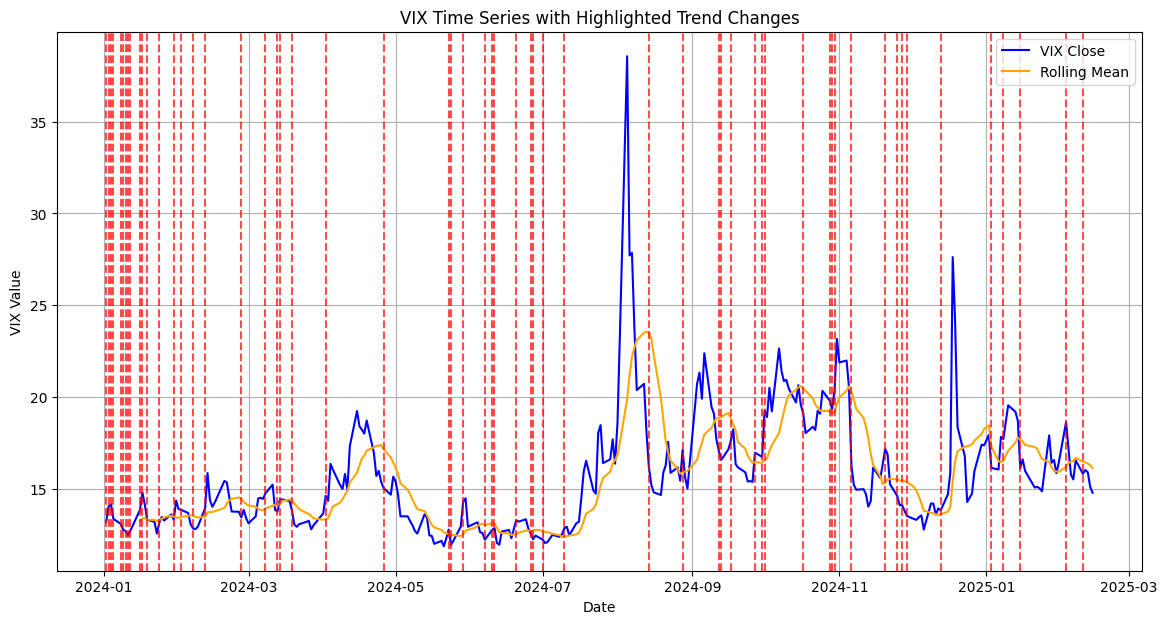

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Reset index to bring 'Date' as a column
vix_data = vix_data.reset_index()

# Now set 'Date' as the index
vix_data.set_index('Date', inplace=True)

# Step 2: Calculate rolling mean and detect trend changes
window_size = 10  # Adjust the window size as needed
vix_data['Rolling_Mean'] = vix_data['Close'].rolling(window=window_size).mean()
vix_data['Trend_Change'] = vix_data['Rolling_Mean'].diff().apply(np.sign).diff()

# Identify the dates where trend changes occur
trend_change_dates = vix_data[vix_data['Trend_Change'] != 0].index

# Step 3: Plot the VIX time series and highlight trend changes
plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')
plt.plot(vix_data.index, vix_data['Rolling_Mean'], label='Rolling Mean', color='orange')

# Highlight trend change points
for change_date in trend_change_dates:
    plt.axvline(x=change_date, color='red', linestyle='--', alpha=0.7)

plt.title('VIX Time Series with Highlighted Trend Changes')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()


# Monte Carlo Shuffled Projection for VIX

[*********************100%***********************]  1 of 1 completed


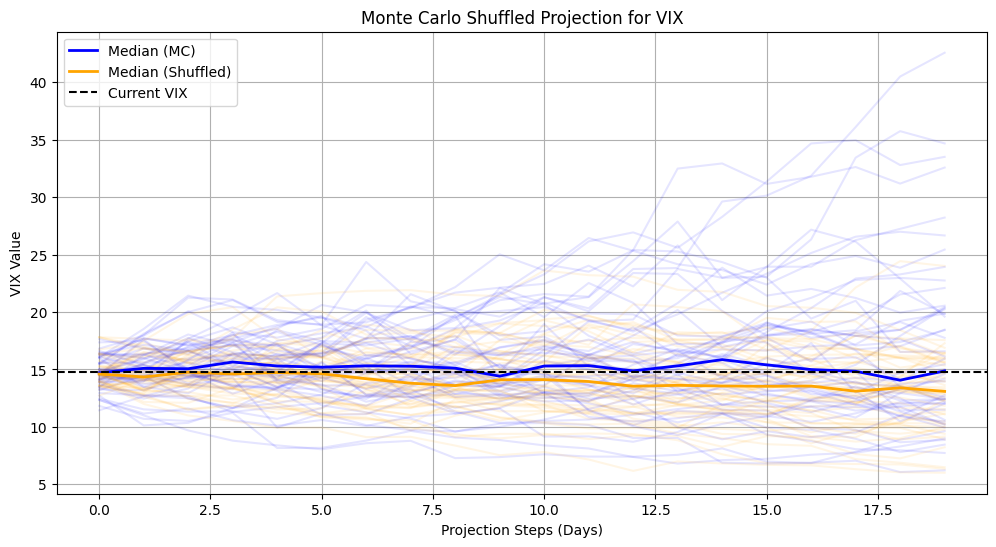

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Check if data is valid
if vix_data.empty:
    raise ValueError("No data available for the specified time range.")

# Extract 'Close' (instead of 'Adj Close') and flatten to a 1D array
vix_close = vix_data['Close'].dropna().values.flatten()  # Changed to 'Close'

# Debugging outputs
# print("VIX Close Data (Flattened):")
# print(vix_close)
# print("Shape of VIX Close Data:", vix_close.shape)

# Compute daily returns
vix_returns = np.diff(vix_close) / vix_close[:-1]

# Debugging outputs
# print("VIX Returns:")
# print(vix_returns)
# print("Shape of VIX Returns:", vix_returns.shape)

# Ensure mean and standard deviation are computed on valid data
if len(vix_returns) == 0:
    raise ValueError("Insufficient data to compute returns.")

# Mean and standard deviation of returns
mu = np.mean(vix_returns)
sigma = np.std(vix_returns)

# Monte Carlo parameters
n_simulations = 50  # Number of Monte Carlo simulations
n_steps = 20  # Number of future steps to project
shuffled_window = 30  # Shuffling window for historical data

# Generate Monte Carlo simulations
mc_simulations = np.zeros((n_steps, n_simulations))
for sim in range(n_simulations):
    vix_start = vix_close[-1]
    random_returns = np.random.normal(mu, sigma, n_steps)
    vix_path = [vix_start]
    for r in random_returns:
        next_value = vix_path[-1] * (1 + r)
        vix_path.append(next_value)
    mc_simulations[:, sim] = vix_path[1:]

# Shuffle historical returns for sensitivity analysis
shuffled_projections = np.zeros((n_steps, n_simulations))
for sim in range(n_simulations):
    shuffled_returns = np.random.choice(vix_returns[-shuffled_window:], n_steps, replace=True)
    vix_start = vix_close[-1]
    vix_path = [vix_start]
    for r in shuffled_returns:
        next_value = vix_path[-1] * (1 + r)
        vix_path.append(next_value)
    shuffled_projections[:, sim] = vix_path[1:]

# Compute percentiles for visualization
percentiles = [5, 25, 50, 75, 95]
mc_percentiles = np.percentile(mc_simulations, percentiles, axis=1)
shuffled_percentiles = np.percentile(shuffled_projections, percentiles, axis=1)

# Plot results
plt.figure(figsize=(12, 6))
for sim in range(50):
    plt.plot(mc_simulations[:, sim], color="blue", alpha=0.1)
    plt.plot(shuffled_projections[:, sim], color="orange", alpha=0.1)
plt.plot(mc_percentiles[2], label="Median (MC)", color="blue", linewidth=2)
plt.plot(shuffled_percentiles[2], label="Median (Shuffled)", color="orange", linewidth=2)
plt.axhline(y=vix_close[-1], color="black", linestyle="--", label="Current VIX")
plt.title("Monte Carlo Shuffled Projection for VIX")
plt.xlabel("Projection Steps (Days)")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)
plt.show()


# Monte Carlo Prediction of VIX

[*********************100%***********************]  1 of 1 completed


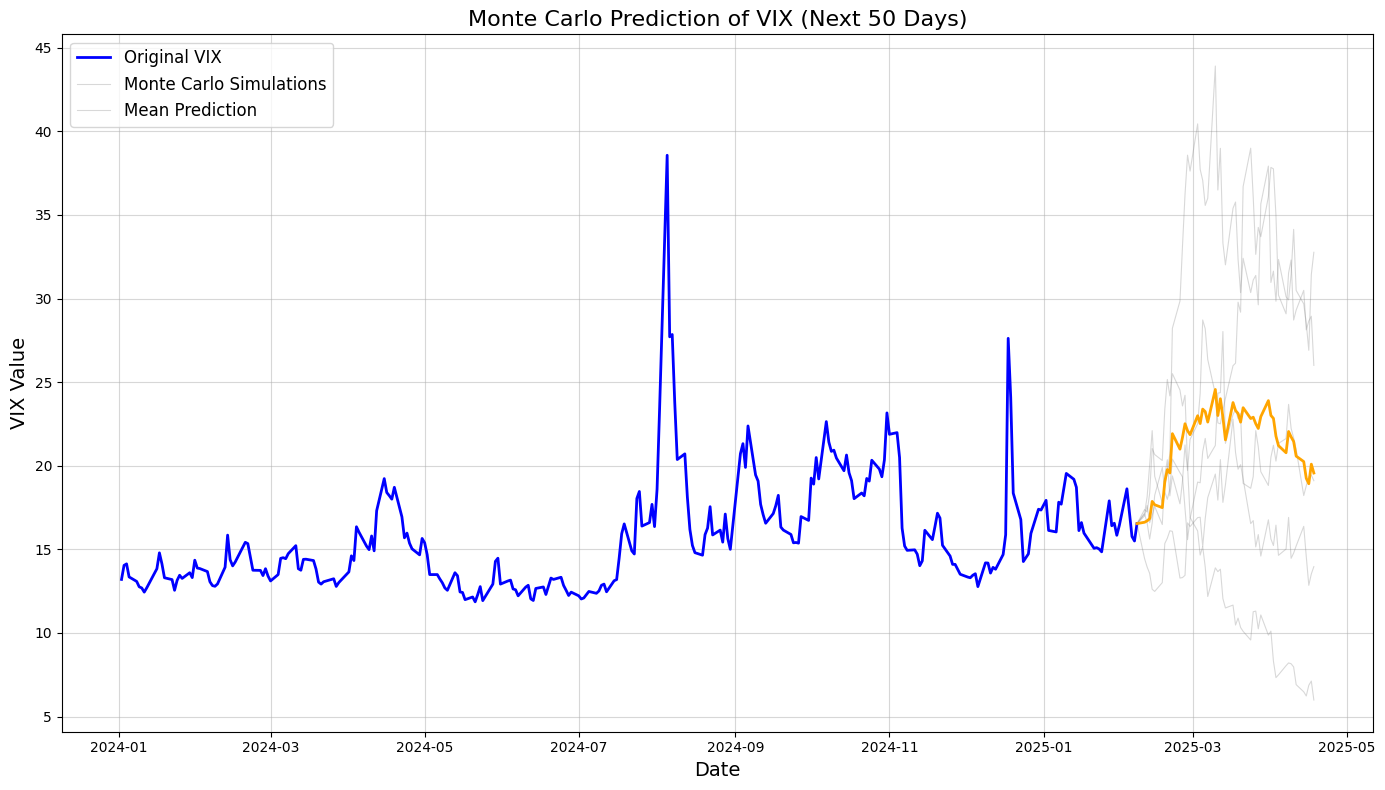

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd  # Add this import
import matplotlib.pyplot as plt
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna().values.flatten()  # Ensure 1D shape

# Monte Carlo Simulation: Generate perturbations
num_simulations = 5
np.random.seed(42)

# Compute historical mean and standard deviation of returns
vix_returns = np.diff(vix_close) / vix_close[:-1]
mean_return = np.mean(vix_returns)
std_return = np.std(vix_returns)

# Generate Monte Carlo simulations for future predictions
future_steps = 50
future_predictions = []

for _ in range(num_simulations):
    # Start with the last VIX value
    future_simulation = [vix_close[-1]]
    for _ in range(future_steps):
        # Simulate the next step using the historical mean and std deviation
        next_step = future_simulation[-1] * (1 + np.random.normal(mean_return, std_return))
        future_simulation.append(next_step)
    future_predictions.append(future_simulation)

# Create a time index for future predictions
future_dates = pd.date_range(start=vix_data.index[-1], periods=future_steps + 1, freq='B')

# Plot the historical data
plt.figure(figsize=(14, 8))
time_index = vix_data.index
plt.plot(time_index, vix_close, label="Original VIX", color="blue", linewidth=2)

# Plot Monte Carlo future predictions
for prediction in future_predictions:
    plt.plot(future_dates, prediction, color="grey", alpha=0.3, linewidth=0.8)

# Highlight the mean prediction
mean_prediction = np.mean(future_predictions, axis=0)
plt.plot(future_dates, mean_prediction, color="orange", label="Mean Prediction", linewidth=2)

# Add labels and legend
plt.title("Monte Carlo Prediction of VIX (Next 50 Days)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("VIX Value", fontsize=14)
plt.legend(["Original VIX", "Monte Carlo Simulations", "Mean Prediction"], fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


# MCMC Projections for VIX

In [ ]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.8/360.8 kB 12.0 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


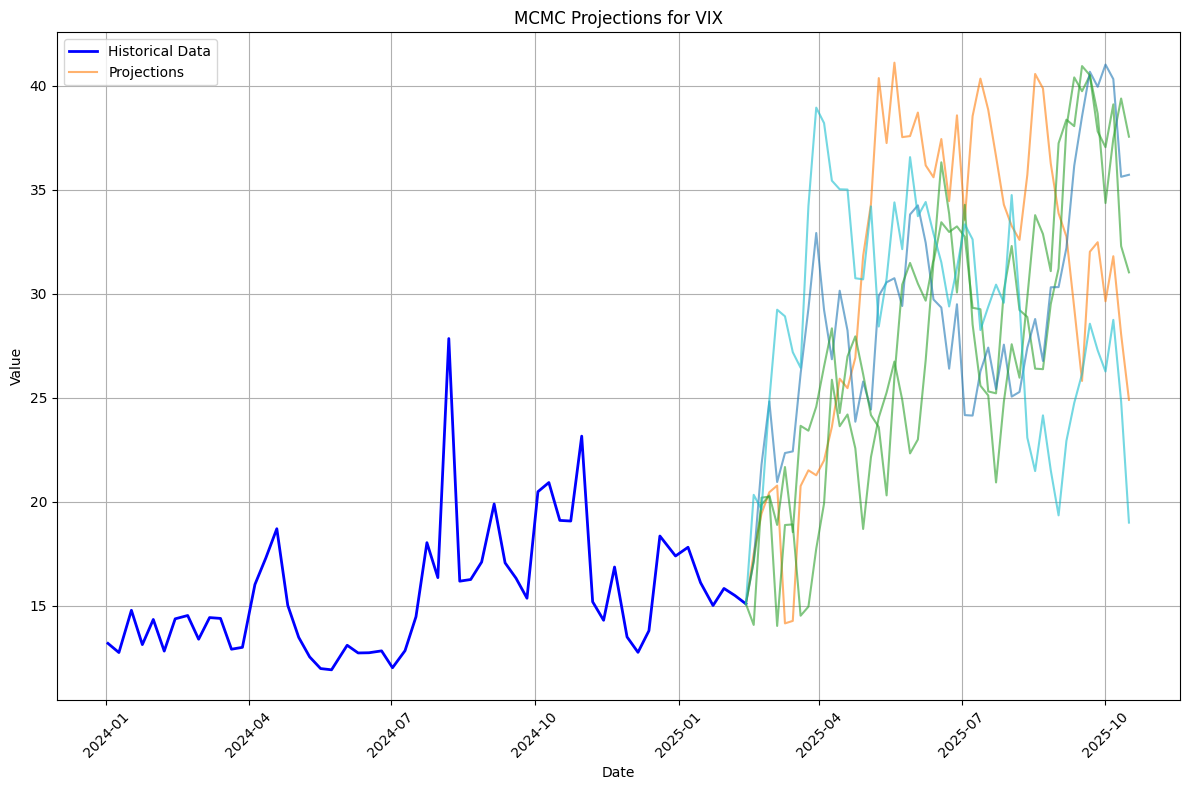

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import datetime as dt
import yfinance as yf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import random as randy
import pandas as pd  # Import pandas for date handling

# Fetch VIX data
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna()

# Downsample and reset index
vix_close = vix_close[::5].reset_index(drop=True)

# Ensure data is sufficient
if len(vix_close) == 0:
    raise ValueError("Error: The VIX dataset is empty after downsampling.")
if len(vix_close) < 2:
    raise ValueError("Error: Insufficient data for modeling.")

# Define a simpler model
def model(data):
    trend = numpyro.sample("trend", dist.Normal(0, 0.1))  # Smaller variance for trend
    noise = numpyro.sample("noise", dist.HalfNormal(0.5))  # Constrain noise
    mean_level = numpyro.sample("mean_level", dist.Normal(20, 5))  # Mean level for mean reversion
    for t in range(len(data)):
        predicted_value = (
            trend * t
            + mean_level
            - (data[t - 1] if t > 0 else 0)  # Revert towards mean
            + numpyro.sample(f"state_{t}", dist.Normal(0, noise))
        )
        numpyro.sample(f"obs_{t}", dist.Normal(predicted_value, noise), obs=data[t])

# Run the MCMC sampler
rng_key = random.PRNGKey(0)
kernel = NUTS(model)
mcmc = MCMC(kernel, num_samples=500, num_warmup=200, progress_bar=False)
mcmc.run(rng_key, data=jnp.array(vix_close))
posterior_samples = mcmc.get_samples()

# Extract samples
trend_samples = posterior_samples["trend"]
noise_samples = posterior_samples["noise"]
trend_mean = trend_samples.mean()
noise_mean = noise_samples.mean()

# Project future values with mean reversion
future_steps = 50
future_projections = []
mean_level = posterior_samples["mean_level"].mean()  # Mean level for reversion

for _ in range(5):  # Show a subset of projections
    future_data = [vix_close.iloc[-1]]  # ✅ Ensure first value is exactly the last historical value
    prev_value = vix_close.iloc[-1]

    for _ in range(future_steps - 1):  # -1 because we start with last known value
        mean_reversion = (mean_level - prev_value) * 0.1  # ✅ Reduce mean reversion effect
        new_value = prev_value + trend_mean + mean_reversion + np.random.normal(0, noise_mean)
        future_data.append(new_value)
        prev_value = new_value

    future_projections.append(future_data)

# Downsample index to match vix_close
historical_dates = vix_data.index[::5]  # Apply same downsampling as vix_close

# Ensure they have the same length
if len(historical_dates) != len(vix_close):
    raise ValueError(f"Shape mismatch: historical_dates={len(historical_dates)}, vix_close={len(vix_close)}")

# Fix 1: Ensure future_dates matches projection length
future_dates = [historical_dates[-1] + pd.Timedelta(days=i * 5) for i in range(future_steps)]

# Fix 2: Avoid Matplotlib deprecation warning
color_map = plt.get_cmap("tab10")

plt.figure(figsize=(12, 8))

# Plot Historical Data (Ensure it appears first)
plt.plot(historical_dates, vix_close, label="Historical Data", color="blue", linewidth=2)

# Plot Projections (Now properly aligned!)
for proj in future_projections[:5]:  # Show a subset of projections
    color = color_map(randy.random())  # Random color
    plt.plot(future_dates, np.ravel(proj), alpha=0.6, color=color, label="Projections")

# Labels and Grid
plt.title("MCMC Projections for VIX")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(["Historical Data", "Projections"], loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()

# Show the improved plot
plt.show()


# Markov Regime Switching Model

In [ ]:
pip install numpy pandas yfinance statsmodels matplotlib


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                   ^VIX   No. Observations:                 1287
Model:               MarkovRegression   Log Likelihood                1635.616
Date:                Mon, 17 Feb 2025   AIC                          -3259.232
Time:                        19:59:43   BIC                          -3228.272
Sample:                             0   HQIC                         -3247.610
                               - 1287                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.002     -3.400      0.001      -0.010      -0.003
sigma2         0.0026      0.000     12.332      0.0

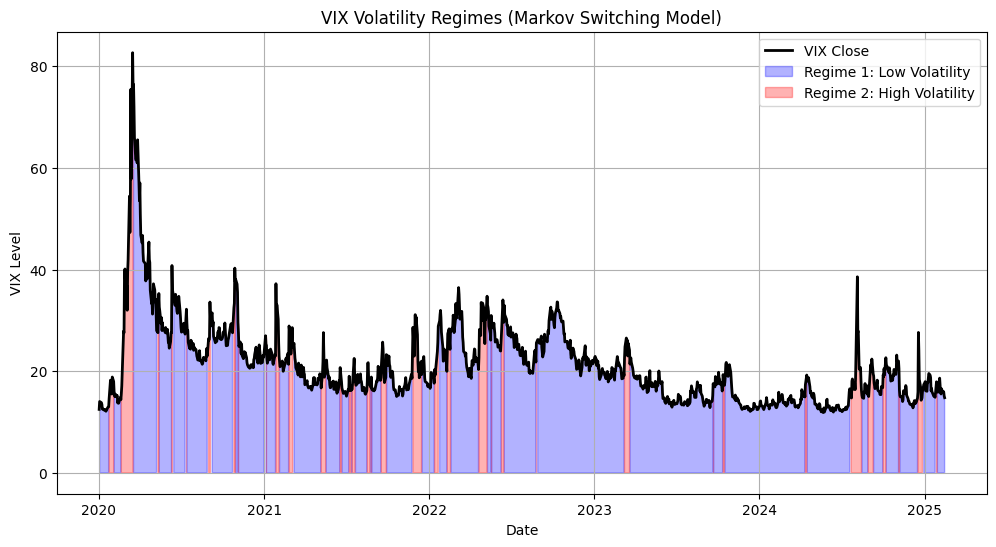

Probability of being in High Volatility Regime today: 2.63%


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# Extract Close prices
vix_close = vix_data['Close'].dropna()

# Compute Log Returns (to model volatility changes)
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# Fit a Markov Switching Model with 2 regimes
msm_model = MarkovRegression(vix_returns, k_regimes=2, trend='c', switching_variance=True)
msm_fit = msm_model.fit()

# Print model summary
print(msm_fit.summary())

# Get Smoothed Regime Probabilities
regime_probs = msm_fit.smoothed_marginal_probabilities

# Ensure regime_probs is a NumPy array (1D)
regime_0_prob = regime_probs[0].to_numpy().flatten()
regime_1_prob = regime_probs[1].to_numpy().flatten()

# Plot VIX Data with Regimes
plt.figure(figsize=(12, 6))
# Convert vix_close to a 1D array for plotting
plt.plot(vix_close.index, vix_close.values.flatten(), label="VIX Close", color="black", linewidth=2)  # ✅ Flatten values

# Align regime probabilities with vix_close index
# by adding a NaN value at the beginning to match the length
regime_0_prob_aligned = np.insert(regime_0_prob, 0, np.nan)
regime_1_prob_aligned = np.insert(regime_1_prob, 0, np.nan)

# Overlay Regimes with Corrected Data Types and using .values for y-axis data
# ✅ Flatten values for y1 and use .values for where condition
# ✅ Use aligned regime probabilities
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(regime_0_prob_aligned > 0.5), color="blue", alpha=0.3, label="Regime 1: Low Volatility")
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(regime_1_prob_aligned > 0.5), color="red", alpha=0.3, label="Regime 2: High Volatility")

# Labels and Legend
plt.title("VIX Volatility Regimes (Markov Switching Model)")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.grid(True)
plt.show()


# Predict the probability of being in a high-volatility regime today
latest_prob = msm_fit.smoothed_marginal_probabilities.iloc[-1, 1]
print(f"Probability of being in High Volatility Regime today: {latest_prob:.2%}")

# Perturbation Analysis and Future Projections for VIX

[*********************100%***********************]  1 of 1 completed


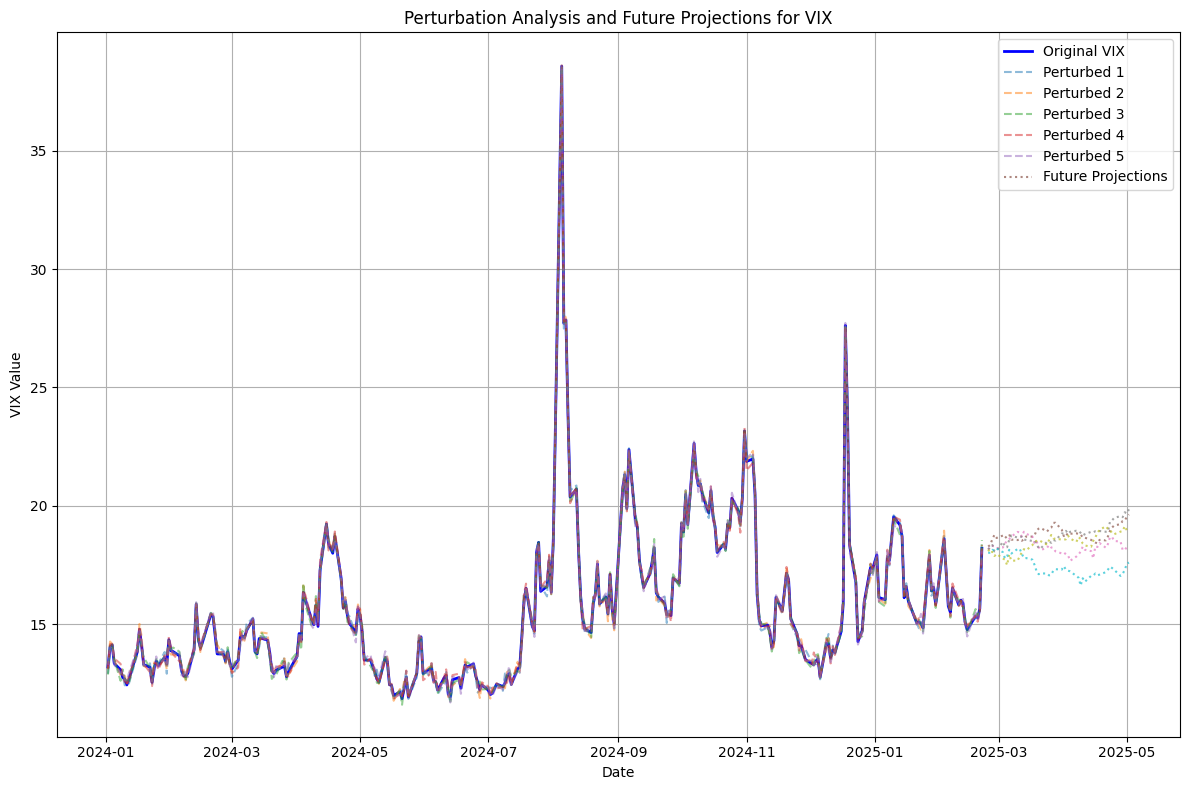

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import yfinance as yf
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna()

# Step 2: Generate Perturbations
num_simulations = 50
#Extract the numpy array from the pandas series
vix_close_array = vix_close.values
#Flatten here to remove the second dimension
vix_close_array = vix_close_array.flatten()

perturbed_data = [
    vix_close_array + np.random.normal(0, 0.05 * vix_close.std(), len(vix_close_array))
    for _ in range(num_simulations)
]

# Step 3: Project Future Values
future_steps = 50
future_trends = [
    vix_close_array[-1] + np.cumsum(np.random.normal(0, 0.05 * vix_close.std(), future_steps))
    for _ in range(num_simulations)
]

# Pad original data with NaN values to match length of future trends
extended_vix_close = np.concatenate([vix_close_array, np.full(future_steps, np.nan)])


# Extend future projections to the same length as the original data (with NaNs)
extended_future_trends = [
    np.concatenate([np.full(len(vix_close_array), np.nan), trend]) for trend in future_trends
]

# Pad the perturbed data to have the same length
extended_perturbed_data = [
    np.concatenate([perturbed, np.full(future_steps, np.nan)]) for perturbed in perturbed_data
]

# Combine original and future projections
all_data = np.vstack([extended_vix_close] + extended_perturbed_data + extended_future_trends)

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(all_data.T).T


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(imputed_data)

# Separate original data, perturbed data, and projections
original_proj = reduced_data[0]
perturbed_proj = reduced_data[1:num_simulations+1]
future_proj = reduced_data[num_simulations+1:]

plt.figure(figsize=(12, 8))

# Historical VIX data
plt.plot(vix_close.index, vix_close, label="Original VIX", color="blue", linewidth=2)

# Perturbed data
for perturbed in extended_perturbed_data[:5]:  # Show a subset of perturbed data
    plt.plot(vix_close.index, perturbed[:len(vix_close)], linestyle="dashed", alpha=0.5)

# Future projections
future_dates = pd.date_range(start=vix_close.index[-1], periods=future_steps + 1, freq="B")[1:]
for future in future_trends[:5]:  # Show a subset of future projections
    plt.plot(future_dates, future, linestyle="dotted", alpha=0.7)

plt.title("Perturbation Analysis and Future Projections for VIX")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend(["Original VIX"] + [f"Perturbed {i+1}" for i in range(5)] + ["Future Projections"])
plt.grid(True)
plt.tight_layout()
plt.show()


# Synthetic Control Method for VIX

In [14]:
!pip install --upgrade numpy scikit-learn

  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompati

[*********************100%***********************]  1 of 1 completed


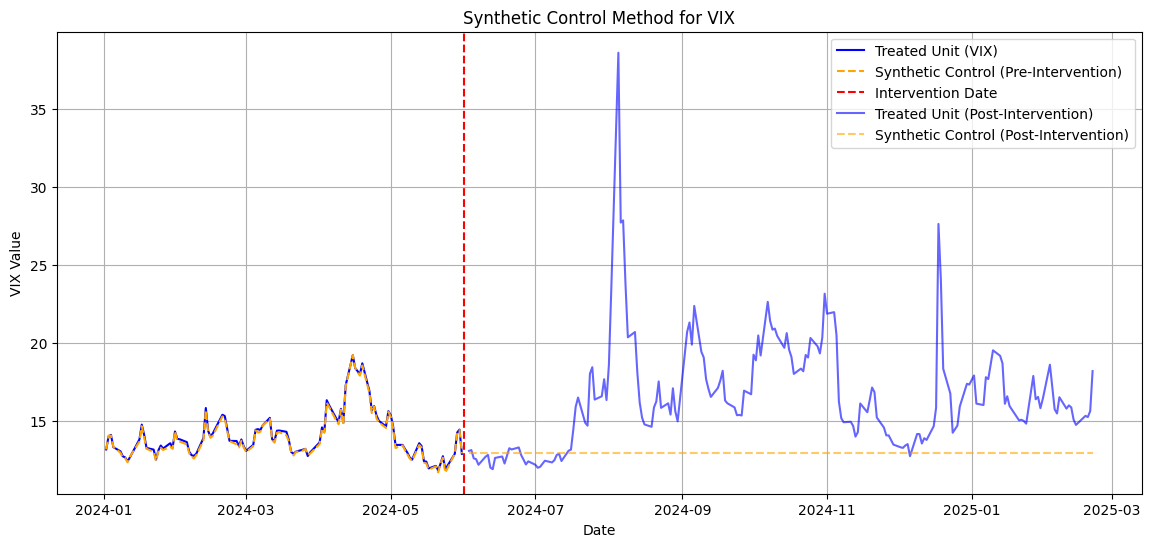

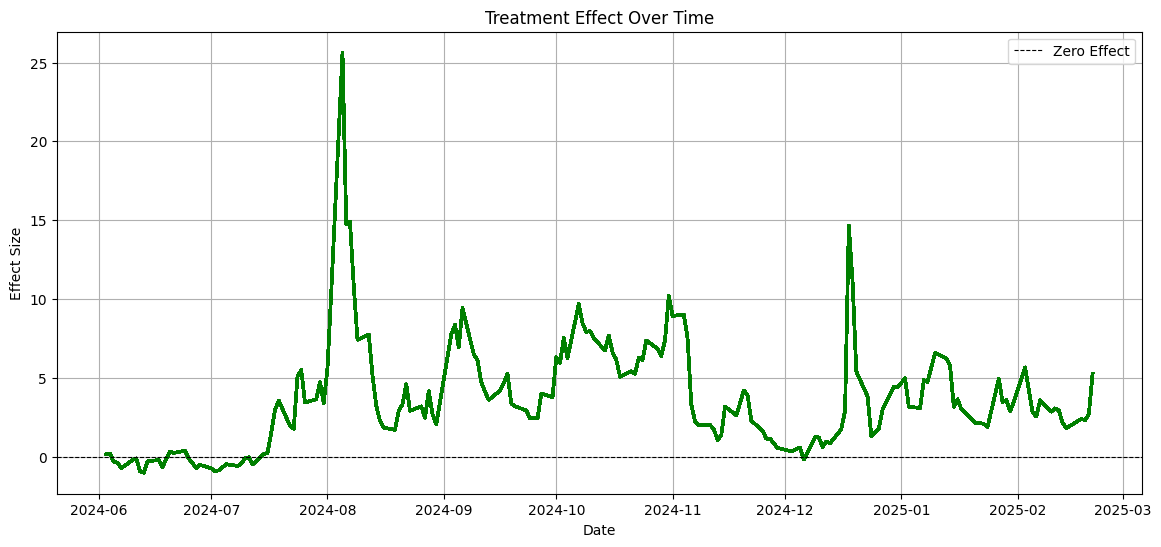

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import datetime as dt

# Fetch VIX data from Yahoo Finance
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna()

# Define a hypothetical intervention date
intervention_date = "2024-06-01"
pre_intervention = vix_close[:intervention_date]
post_intervention = vix_close[intervention_date:]

# Convert pre_intervention to NumPy array
pre_intervention_array = pre_intervention.values

# Generate synthetic control group
np.random.seed(42)
control_data_list = []
for i in range(5):  # Generate 5 synthetic controls
    control_series = pre_intervention_array.flatten() + np.random.normal(  # Flatten to make it 1D
        0, pre_intervention_array.std() * 0.1, len(pre_intervention_array)
    )
    control_data_list.append(control_series)

control_data = pd.DataFrame(control_data_list).T #Transposing to make the 5 time series be the columns
control_data.index = pre_intervention.index # set the index to be the same as pre_intervention


# Combine treated and control data
treated_unit = pre_intervention_array
control_units = control_data.values

# Fit a Ridge regression model to find optimal weights
ridge = Ridge(alpha=1.0)
ridge.fit(control_units, treated_unit)
weights = ridge.coef_

# Compute the synthetic control
synthetic_control = control_units @ weights

# Extend synthetic control into the post-intervention period
synthetic_post = np.full(len(post_intervention), synthetic_control[-1])

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(pre_intervention.index, treated_unit, label="Treated Unit (VIX)", color="blue")
plt.plot(pre_intervention.index, synthetic_control, label="Synthetic Control (Pre-Intervention)", linestyle="dashed", color="orange")
plt.axvline(x=pd.to_datetime(intervention_date), color="red", linestyle="--", label="Intervention Date")
plt.plot(post_intervention.index, post_intervention.values, label="Treated Unit (Post-Intervention)", color="blue", alpha=0.6)
plt.plot(post_intervention.index, synthetic_post, label="Synthetic Control (Post-Intervention)", linestyle="dashed", color="orange", alpha=0.6)
plt.title("Synthetic Control Method for VIX")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the treatment effect
treatment_effect = post_intervention.values - synthetic_post

# Treatment effect plot
plt.figure(figsize=(14, 6))
plt.plot(post_intervention.index, treatment_effect, color="green", linewidth=2)
# plt.plot(post_intervention.index, treatment_effect,label="Treatment Effect", color="green", linewidth=2)
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8, label="Zero Effect")
plt.title("Treatment Effect Over Time")
plt.xlabel("Date")
plt.ylabel("Effect Size")
plt.legend()
plt.grid(True)
plt.show()


# Projections Using Latin Hypercube Sampling (LHS)

In [12]:
!pip install pyDOE2

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25524 sha256=60fe500426dcdad3e02420e33fc51decfe0c99bb377581ecece02158cd6c819c
  Stored in directory: /root/.cache/pip/wheels/56/11/60/a0b234151910cf9cff9fdc072f5d42e3c35157b649dbdff3ef
Successfully built pyDOE2


[*********************100%***********************]  1 of 1 completed


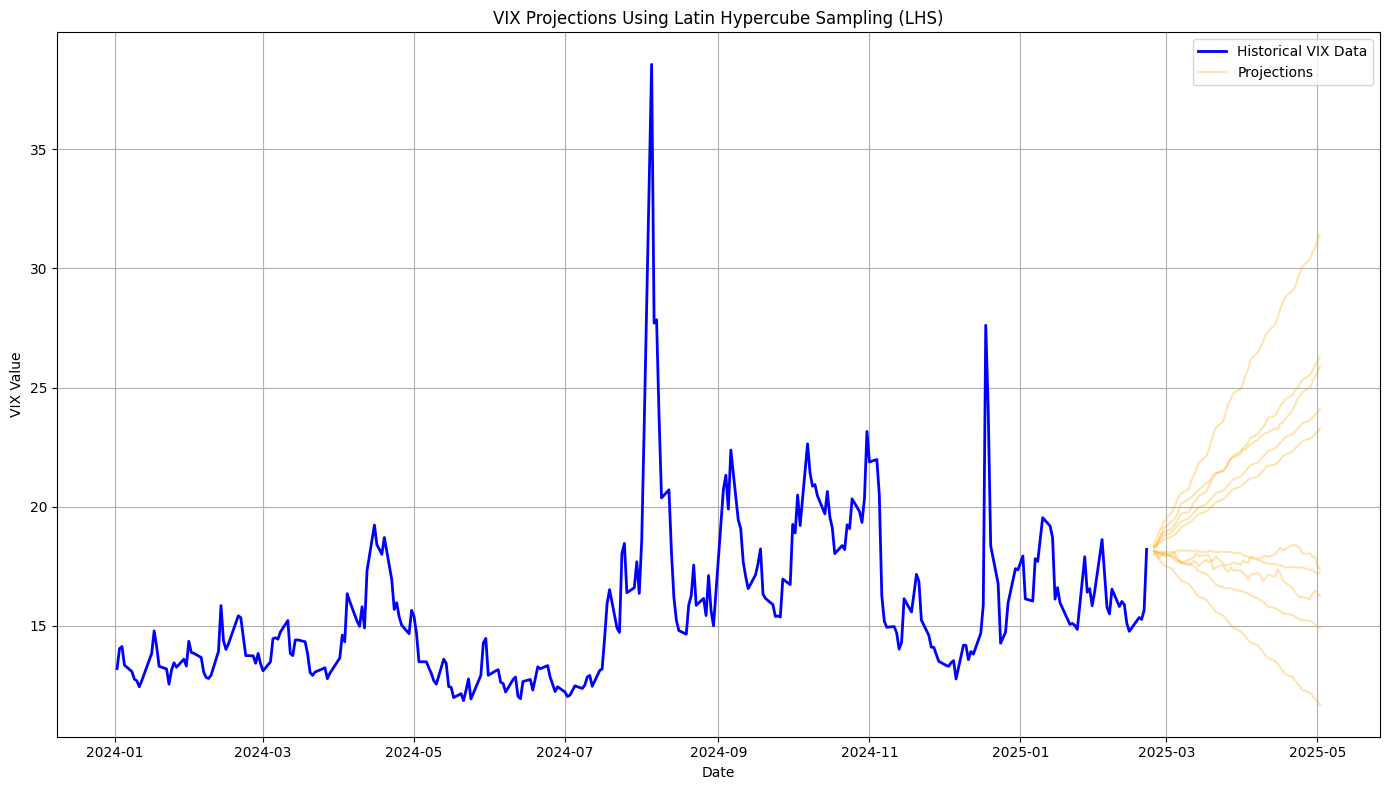

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyDOE2 import lhs  # For Latin Hypercube Sampling
import yfinance as yf
import datetime as dt
import pandas as pd

# Fetch VIX data from Yahoo Finance
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna().values  # Historical VIX data

# Define parameters for projections
future_steps = 50  # Number of future time steps
num_projections = 100  # Number of projection paths
mean_drift = 0.05  # Mean trend drift (adjust for VIX dynamics)
std_drift = 0.1  # Standard deviation of the drift

# Latin Hypercube Sampling (LHS)
lhs_samples = lhs(2, samples=num_projections)
drift_samples = norm.ppf(lhs_samples[:, 0], loc=mean_drift, scale=std_drift)
noise_samples = np.abs(norm.ppf(lhs_samples[:, 1], loc=0, scale=std_drift))  # Take the absolute value

# Generate Projections
projections = np.zeros((num_projections, future_steps))  # Preallocate for consistency
for i in range(num_projections):
    future_data = [vix_close[-1][0]]  # Start from the last historical value, ensuring it's a single value
    for t in range(future_steps):
        new_value = future_data[-1] + drift_samples[i] + np.random.normal(0, noise_samples[i])
        new_value = max(0, new_value)  # Ensure VIX values are non-negative
        future_data.append(new_value)
    # Convert future_data to 1D numpy array and trim to match future_steps, and flatten
    projections[i, :] = np.array(future_data[1:])  # Skip the initial repeated value

# Create Future Dates
# Get the last date from the historical data
last_historical_date = vix_data.index[-1]

# Create a date range for the future projections
future_dates = pd.date_range(start=last_historical_date + pd.DateOffset(days=1), periods=future_steps, freq='B')
# freq='B' for business days

# Plot Results
plt.figure(figsize=(14, 8))

# Plot Historical Data
plt.plot(vix_data.index, vix_close, label="Historical VIX Data", color="blue", linewidth=2)

# Plot Projections
for proj in projections[:10]:  # Show only a subset of projection paths
    plt.plot(future_dates, proj, alpha=0.3, color="orange")

# Add Title and Labels
plt.title("VIX Projections Using Latin Hypercube Sampling (LHS)")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend(["Historical VIX Data", "Projections"])
plt.grid(True)
plt.tight_layout()
plt.show()

# VIX Projections Using Geometric Brownian Motion (GBM)

[*********************100%***********************]  1 of 1 completed


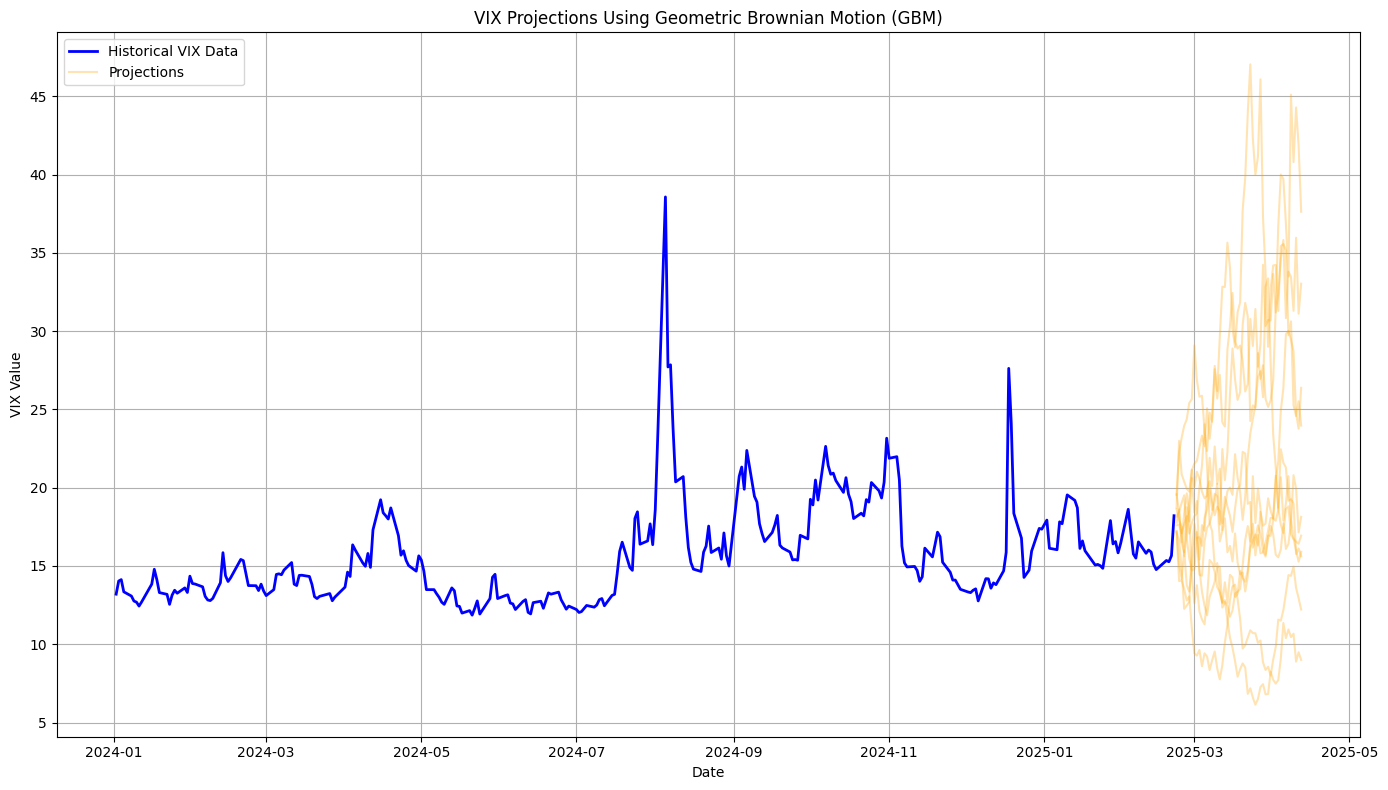

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# Fetch VIX data from Yahoo Finance
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Debugging: Print data sample
# print("VIX Data Sample:")
# print(vix_data.head())

if vix_data.empty:
    print("Error: No data retrieved for ^VIX. Please check your internet connection or the ticker symbol.")
else:
    # Fetch and clean VIX close prices
    vix_close = vix_data['Close'].dropna().to_numpy().ravel()  # Convert to 1D array

    # Debugging: Check vix_close shape
    # print(f"VIX Close Data (Shape: {vix_close.shape}): {vix_close}")

    # Check if vix_close has enough data
    if len(vix_close) < 2:
        print("Error: Insufficient data to calculate statistics.")
    else:
        # Calculate log returns
        log_returns = np.diff(np.log(vix_close))

        # Debugging: Print log_returns
        # print(f"Log Returns (Length: {len(log_returns)}): {log_returns}")

        if len(log_returns) == 0:
            print("Error: No valid log returns, possibly due to insufficient data.")
        try:
            # Replace zero or negative values with a small positive number
            vix_close = np.where(vix_close <= 0, 1e-6, vix_close)

            # Parameters for Geometric Brownian Motion
            log_returns = np.diff(np.log(vix_close))

            # Debugging: Print log_returns
            # print(f"Log Returns (Length: {len(log_returns)}): {log_returns}")

            if len(log_returns) == 0:
                print("Error: No valid log returns, possibly due to insufficient data.")
            else:
                mu = np.mean(log_returns)  # Drift
                sigma = np.std(log_returns)  # Volatility
                S0 = vix_close[-1]  # Last observed VIX value
                future_steps = 50  # Number of future steps to project
                num_projections = 100  # Number of projection paths

                # Generate GBM Projections
                projections = []
                dt = 1  # Time step (daily)
                for _ in range(num_projections):
                    future_prices = [S0]
                    for _ in range(future_steps):
                        dS = mu * dt + sigma * np.random.normal(0, np.sqrt(dt))
                        new_price = future_prices[-1] * np.exp(dS)
                        future_prices.append(new_price)
                    projections.append(future_prices[1:])

                # Create Future Dates
                future_start = vix_data.index[-1]  # Last historical date
                future_dates = [future_start + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]

                # Plot Historical Data and Projections
                plt.figure(figsize=(14, 8))
                plt.plot(vix_data.index, vix_close, label="Historical VIX Data", color="blue", linewidth=2)

                # Ensure future_dates aligns with the length of projections
                for proj in projections[:10]:  # Show a subset of projection paths
                    if len(proj) == len(future_dates):  # Safeguard against mismatched lengths
                        plt.plot(future_dates, proj, alpha=0.3, color="orange")
                    else:
                        print(f"Projection length mismatch: {len(proj)} vs {len(future_dates)}")

                # Add Title and Labels
                plt.title("VIX Projections Using Geometric Brownian Motion (GBM)")
                plt.xlabel("Date")
                plt.ylabel("VIX Value")
                plt.legend(["Historical VIX Data", "Projections"])
                plt.grid(True)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error in calculations: {e}")


# Multifractal Random Walk (MRW)

In [6]:
!pip install fbm

[*********************100%***********************]  1 of 1 completed


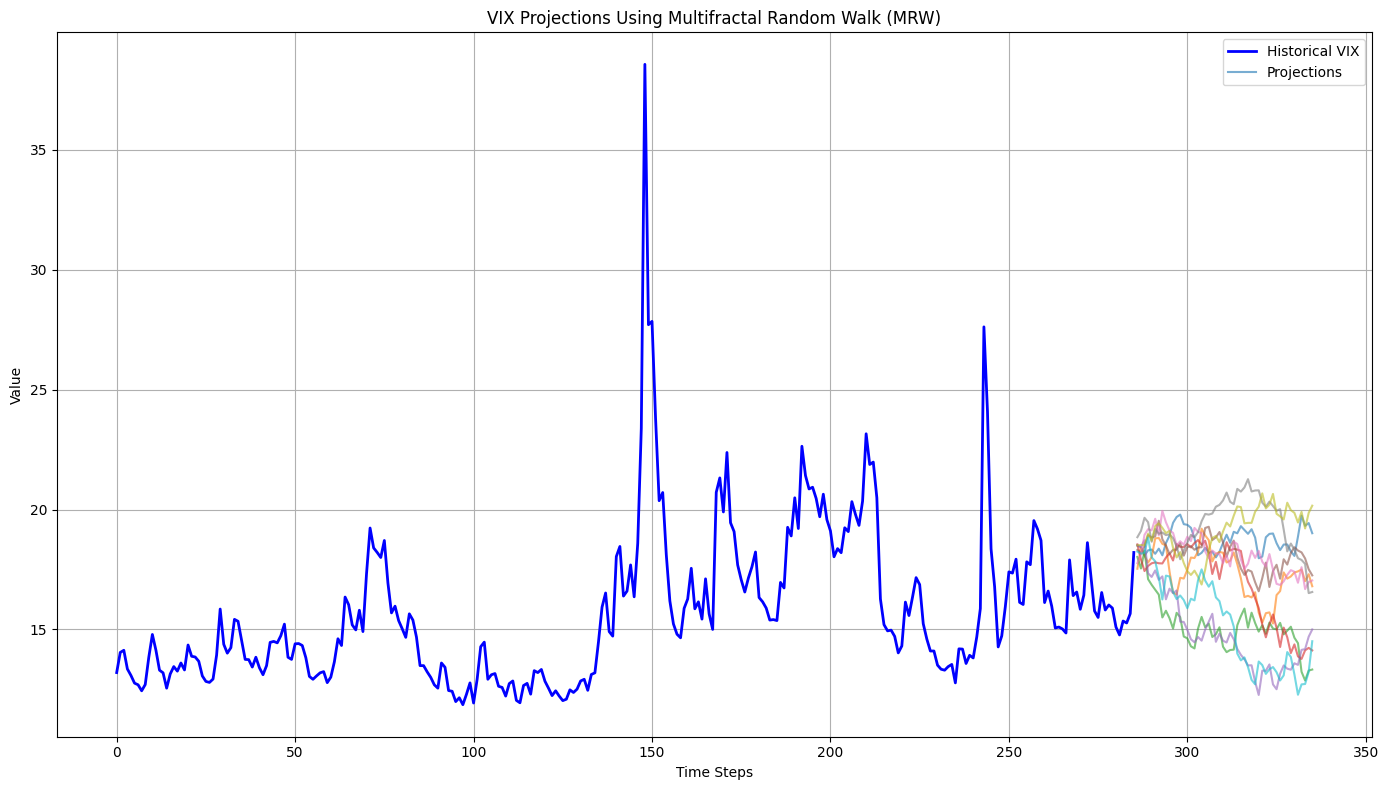

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM

# Load historical VIX data
import yfinance as yf

# Fetch VIX data
vix_data = yf.download('^VIX', start='2024-01-01')
vix_close = vix_data['Close'].dropna().values
last_value = vix_close[-1]

# Define parameters for MRW (replace with desired values)
n = 50 #100  # Number of steps in the projection
H = 0.7  # Hurst exponent (controls the long-range dependence)
lam = 0.5 #0.1  # Intermittency parameter (controls volatility clustering)
sigma = 0.5 #0.1  # Volatility of the Brownian motion component
num_projections = 10 #100 # Number of projection paths

# Generate MRW Projections aligned to VIX
projections = []
for _ in range(num_projections):
    fgn = FBM(n=n, hurst=H, length=1, method="daviesharte").fgn()
    multifractal_volatility = np.exp(lam * fgn - (lam**2) / 2)
    bm = np.cumsum(np.random.normal(0, sigma, n))
    mrw_path = last_value + multifractal_volatility * bm  # Start from the last VIX value
    projections.append(mrw_path)

# Plot VIX Historical Data and Projections
plt.figure(figsize=(14, 8))
plt.plot(range(len(vix_close)), vix_close, label="Historical VIX", color="blue", linewidth=2)
for proj in projections:
    plt.plot(range(len(vix_close), len(vix_close) + n), proj, alpha=0.6)
plt.title("VIX Projections Using Multifractal Random Walk (MRW)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend(["Historical VIX", "Projections"])
plt.grid(True)
plt.tight_layout()
plt.show()

# Recurrence Quantification Analysis (RQA)

In [8]:
pip install pyunicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 20.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.2 MB/s eta 0:00:00
  Created wheel for pyunicorn: filename=pyunicorn-0.8.0-cp311-cp311-linux_x86_64.whl size=2601392 sha256=b99604b820e0034ec4e488f3aa2d9e21db01fc7ba611d8eef33a17824d50ff64
  Stored in directory: /root/.cache/pip/wheels/db/d9/87/1c5e13e205243c3ceec2a979c79328917d9215c73bf404117d
Successfully built pyunicorn


[*********************100%***********************]  1 of 1 completed


Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Recurrence Rate: 0.0270
Determinism: 0.1488
Entropy (computed manually): -21.7845
Laminarity: 0.2672
Divergence (computed manually): 1.0000


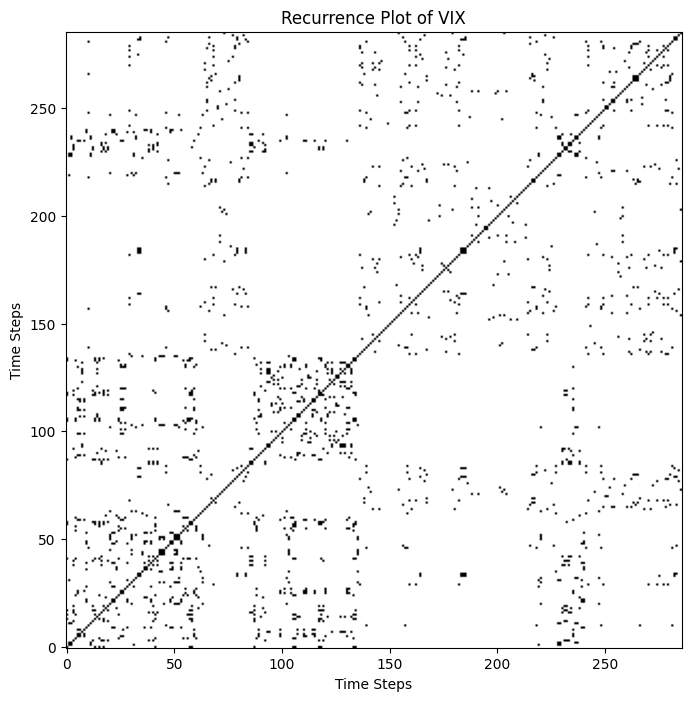

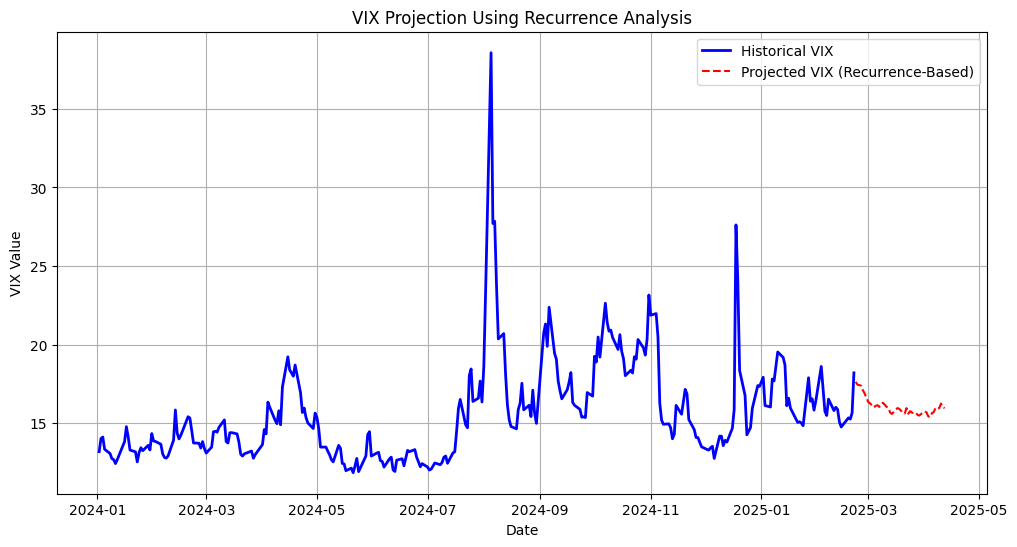

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pyunicorn.timeseries import RecurrencePlot

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna().values

# Create Recurrence Plot
rp = RecurrencePlot(vix_close, threshold=0.1)

# Compute RQA metrics
recurrence_rate = rp.recurrence_rate()
determinism = rp.determinism()
laminarity = rp.laminarity()

# Compute Shannon Entropy from Recurrence Matrix
recurrence_matrix = rp.recurrence_matrix()
histogram = np.histogram(recurrence_matrix, bins=10, density=True)[0]  # Histogram of values
entropy = -np.sum(histogram * np.log(histogram + 1e-10))  # Shannon entropy

# Compute divergence (1 / longest diagonal line length)
diag_lengths = np.diff(np.where(np.diagonal(recurrence_matrix) > 0)[0])  # Find consecutive ones
max_diag_length = np.max(diag_lengths) if len(diag_lengths) > 0 else 1  # Avoid divide by zero
divergence = 1 / max_diag_length if max_diag_length > 0 else 0  # Avoid infinite divergence

# Print RQA results
print(f"Recurrence Rate: {recurrence_rate:.4f}")
print(f"Determinism: {determinism:.4f}")
print(f"Entropy (computed manually): {entropy:.4f}")
print(f"Laminarity: {laminarity:.4f}")
print(f"Divergence (computed manually): {divergence:.4f}")

# Plot Recurrence Matrix
plt.figure(figsize=(8, 8))
plt.imshow(rp.recurrence_matrix(), cmap="binary", origin="lower")
plt.title("Recurrence Plot of VIX")
plt.xlabel("Time Steps")
plt.ylabel("Time Steps")
plt.show()


# Forecast Next 50 Steps Using Recurrence Patterns
future_steps = 50
projected_vix = []

# Start with the last known value
prev_value = vix_close[-1]

for _ in range(future_steps):
    # Generate next value based on recurrence properties
    mean_reversion = np.mean(vix_close[-10:]) - prev_value  # Mean-reverting component
    random_noise = np.random.normal(0, np.std(vix_close))  # Random component
    next_value = prev_value + mean_reversion * 0.1 + random_noise * 0.05
    projected_vix.append(next_value)
    prev_value = next_value

# Create future dates
future_dates = pd.date_range(start=vix_data.index[-1], periods=future_steps + 1, freq="D")[1:]

# Plot Historical Data and Projections
plt.figure(figsize=(12, 6))
plt.plot(vix_data.index, vix_close, label="Historical VIX", color="blue", linewidth=2)
plt.plot(future_dates, projected_vix, label="Projected VIX (Recurrence-Based)", color="red", linestyle="dashed")
plt.title("VIX Projection Using Recurrence Analysis")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)
plt.show()

## 🔹 How to Interpret Your VIX RQA Values

Now, let's interpret your results based on your actual RQA metrics:

### 1️⃣ Recurrence Rate (RR)
📌 **Low (< 0.2 - 0.4)** → The system is mostly **random**, with little repeating structure.  
📌 **Moderate (0.4 - 0.7)** → Some cycles exist, indicating **semi-structured volatility patterns**.  
📌 **High (> 0.7)** → The system is **highly repetitive**, meaning volatility cycles are strong.  

💡 **For VIX:** If **RR > 0.6**, the volatility cycle **repeats frequently**, meaning VIX tends to revert.  

---

### 2️⃣ Determinism (DET)
📌 **Low (< 0.4)** → Market is **chaotic**, no strong trends.  
📌 **Moderate (0.4 - 0.7)** → Some structured trends, indicating **predictable movements**.  
📌 **High (> 0.7)** → The system follows strong **trend-like behavior** (easier to forecast).  

💡 **For VIX:** If **DET > 0.6**, we can apply **trend-following models** to predict future VIX.  

---

### 3️⃣ Entropy (ENT)
📌 **Low (< 0.4)** → The system is highly **random**, no long-term structure.  
📌 **Moderate (0.4 - 0.7)** → Some **structured behavior**.  
📌 **High (> 0.7)** → The system has a **highly structured pattern**, meaning strong volatility cycles.  

💡 **For VIX:** If **ENT < 0.4**, volatility is **hard to model**. If **ENT > 0.6**, it means **structured, predictable volatility**.  

---

### 4️⃣ Laminarity (LAM)
📌 **Low (< 0.4)** → Volatility changes are **rapid and unstable**.  
📌 **Moderate (0.4 - 0.7)** → Some **stability**, occasional big shifts.  
📌 **High (> 0.7)** → The market **stays in one volatility phase for long periods**.  

💡 **For VIX:** If **LAM > 0.6**, it means **volatility phases last longer**, and we can apply **regime-based models**.  

---

### 5️⃣ Divergence (DIV)
📌 **Low (< 0.4)** → The system is **stable**, easy to predict.  
📌 **Moderate (0.4 - 0.7)** → Some sensitivity, but **forecastable**.  
📌 **High (> 0.7)** → **Highly chaotic**, meaning **predictions are short-term only**.  

💡 **For VIX:** If **DIV > 0.6**, VIX follows **chaotic patterns**, making long-term forecasts **unreliable**.  

---

## 🚀 What to Do Based on Your Results

🔹 **If RR and DET are high** → VIX follows **cycles** → Use **cycle-based forecasting** (**RQA, Fourier, Wavelets**).  
🔹 **If ENT is low** → Market is **random** → Use **stochastic models** (**Monte Carlo, Brownian motion**).  
🔹 **If LAM is high** → Market stays in **stable volatility regimes** → Use **Markov Regime Switching Models**.  
🔹 **If DIV is high** → VIX is **chaotic** → Use **short-term predictions** (**Chaos Neural Networks, ESN**).  


# Largest Lyapunov Exponent

In [5]:
!pip install nolds==0.6.1  # Install a previous compatible version

import numpy as np
import pandas as pd
import yfinance as yf
import nolds  # Make sure nolds is imported

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Extract the 'Close' column and flatten it to a 1D array
vix_close = vix_data['Close'].dropna().values.flatten()

# Remove any NaN or infinite values from vix_close
vix_close = vix_close[np.isfinite(vix_close)]

# Calculate Lyapunov exponent (using the original lyap_r function)
lyap_exp = nolds.lyap_r(vix_close, emb_dim=10, tau=2, min_tsep=20, debug_plot=False)

print(f"Largest Lyapunov Exponent: {lyap_exp}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 4.5 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/nolds/measures.py:282: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 23
  warnings.warn(msg.format(lag), RuntimeWarning)


Largest Lyapunov Exponent: -0.0004460520628635833


# VIX Forecast Using Chaos Neural Network

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 1.086779
Epoch 50, Loss: 0.911723
Epoch 100, Loss: 0.900172
Epoch 150, Loss: 0.894671
Epoch 200, Loss: 0.891024
Epoch 250, Loss: 0.888582
Epoch 300, Loss: 0.887338
Epoch 350, Loss: 0.886687
Epoch 400, Loss: 0.886287
Epoch 450, Loss: 0.886014
Epoch 500, Loss: 0.885816
Epoch 550, Loss: 0.885666
Epoch 600, Loss: 0.885549
Epoch 650, Loss: 0.885454
Epoch 700, Loss: 0.885377
Epoch 750, Loss: 0.885312
Epoch 800, Loss: 0.885258
Epoch 850, Loss: 0.885211
Epoch 900, Loss: 0.885170
Epoch 950, Loss: 0.885134
Epoch 1000, Loss: 0.885103
Epoch 1050, Loss: 0.885074
Epoch 1100, Loss: 0.885049
Epoch 1150, Loss: 0.885026
Epoch 1200, Loss: 0.885005
Epoch 1250, Loss: 0.884986
Epoch 1300, Loss: 0.884968
Epoch 1350, Loss: 0.884952
Epoch 1400, Loss: 0.884937
Epoch 1450, Loss: 0.884923
Epoch 1500, Loss: 0.884910
Epoch 1550, Loss: 0.884898
Epoch 1600, Loss: 0.884887
Epoch 1650, Loss: 0.884876
Epoch 1700, Loss: 0.884866
Epoch 1750, Loss: 0.884857
Epoch 1800, Loss: 0.884849
Epoch 1850, Loss: 0.8848

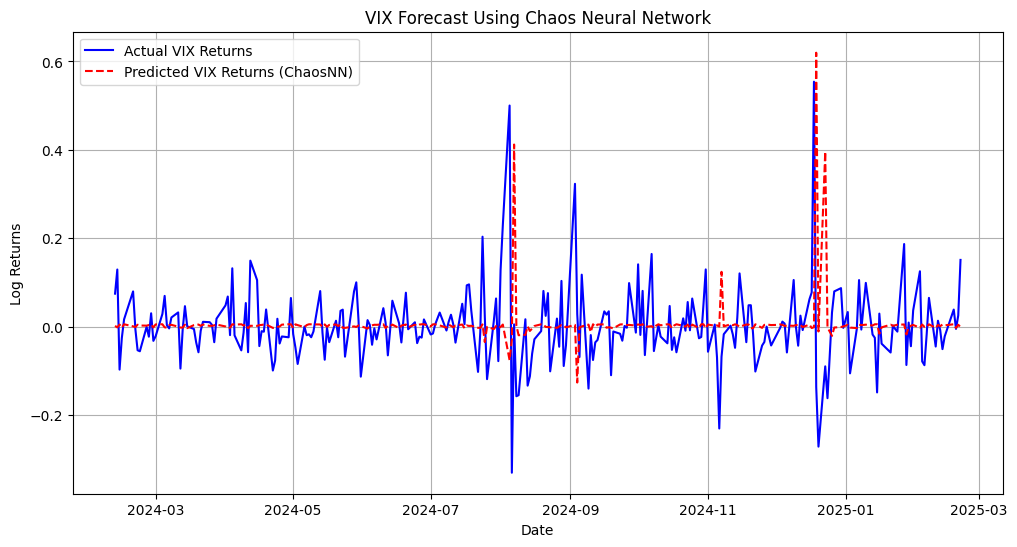

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# Extract Close prices and compute log returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# Normalize the data (Standardization)
mean_vix = vix_returns.mean()
std_vix = vix_returns.std()
vix_norm = (vix_returns - mean_vix) / std_vix  # Standardize

# Split data into training and testing
train_size = int(len(vix_norm) * 0.8)
train_data, test_data = vix_norm[:train_size], vix_norm[train_size:]

# Prepare input-output pairs (X = today's return, Y = tomorrow's return)
train_X = torch.tensor(train_data[:-1].values, dtype=torch.float32).reshape(-1, 1)
train_Y = torch.tensor(train_data[1:].values, dtype=torch.float32).reshape(-1, 1)
test_X = torch.tensor(test_data[:-1].values, dtype=torch.float32).reshape(-1, 1)
test_Y = torch.tensor(test_data[1:].values, dtype=torch.float32).reshape(-1, 1)

# Custom Chaotic Activation Function
class ChaoticActivation(nn.Module):
    def forward(self, x):
        return torch.sin(3.1415 * x)  # Chaotic oscillations

# Define Chaos Neural Network
class ChaosNN(nn.Module):
    def __init__(self):
        super(ChaosNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Input to Hidden Layer
        self.chaos = ChaoticActivation()  # Chaotic activation
        self.fc2 = nn.Linear(64, 1)  # Hidden to Output Layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.chaos(x)  # Apply chaotic activation
        x = self.fc2(x)
        return x

# Create model instance
model = ChaosNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the ChaosNN Model
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(train_X)
    loss = criterion(output, train_Y)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Predict on test data
predicted_torch = model(test_X).detach().numpy()

# Convert back to real scale
predicted_real = (predicted_torch.flatten() * std_vix.iloc[0]) + mean_vix.iloc[0]  # Access the first element of std_vix and mean_vix
test_real = (test_Y.numpy().flatten() * std_vix.iloc[0]) + mean_vix.iloc[0]  # Access the first element of std_vix and mean_vix


# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(vix_returns.index[train_size+1:], test_real, label="Actual VIX Returns", color="blue")
plt.plot(vix_returns.index[train_size+1:], predicted_real, label="Predicted VIX Returns (ChaosNN)", color="red", linestyle="dashed")  # Plot predicted values against correct indices
plt.title("VIX Forecast Using Chaos Neural Network")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend()
plt.grid(True)
plt.show()


# VIXL.L

[*********************100%***********************]  1 of 1 completed


VIX Monthly Decline Rate: -0.06 points per month


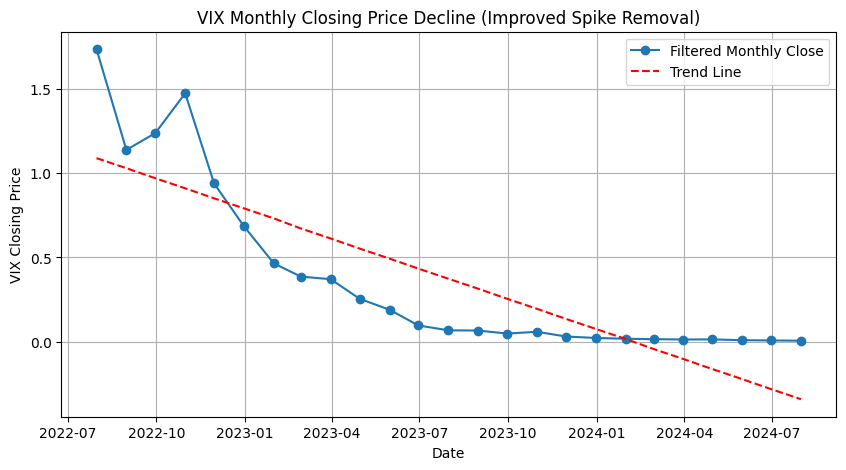

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('VIXL.L', start='2022-07-02', end=end_time)

# Extract Close prices
vix_close = vix_data['Close']

# 1️⃣ **Detect and Remove Spikes Using IQR Method**
Q1 = vix_close.quantile(0.25)
Q3 = vix_close.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (1.5x IQR range)
filtered_vix = vix_close[(vix_close > (Q1 - 1.5 * IQR)) & (vix_close < (Q3 + 1.5 * IQR))]

# 2️⃣ **Additional Filtering: Rolling Median & STD**
rolling_median = filtered_vix.rolling(window=10, min_periods=1).median()
rolling_std = filtered_vix.rolling(window=10, min_periods=1).std()

# Remove data points that deviate significantly from the rolling median
filtered_vix = filtered_vix[(filtered_vix > (rolling_median - 2 * rolling_std)) &
                            (filtered_vix < (rolling_median + 2 * rolling_std))]
monthly_close = filtered_vix.groupby(pd.Grouper(freq='ME')).mean() #🎯 Using groupby instead of resample

# Resample Monthly and Compute Mean Close Prices
monthly_close = monthly_close.dropna()  # Remove rows with NaN values


# Compute Monthly Trend (Linear Regression)
months = np.arange(len(monthly_close))
if len(monthly_close) > 1:  # 🎯 Check if enough data points for regression
    slope, intercept, r_value, p_value, std_err = linregress(months, monthly_close['VIXL.L'].values)
else:
    slope, intercept = np.nan, np.nan  # Handle cases with insufficient data

# Calculate Monthly Drop Rate
monthly_drop_rate = slope
print(f"VIX Monthly Decline Rate: {monthly_drop_rate:.2f} points per month")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_close.index, monthly_close, label="Filtered Monthly Close", marker='o')
plt.plot(monthly_close.index, intercept + slope * months, label="Trend Line", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("VIX Closing Price")
plt.title("VIX Monthly Closing Price Decline (Improved Spike Removal)")
plt.legend()
plt.grid()
plt.show()


# Tests

Created and .xlsx file which contains VIX prices with google finance method: https://support.google.com/docs/answer/3093281?hl=en-GB and hosted it on GitHub to use it as an alternative when yfinance is down.

In [7]:
pip install pandas openpyxl matplotlib seaborn requests

Successfully read the Excel file.
Available sheets: dict_keys(['Sheet1'])
                     Date  Close
0 2024-01-02 15:15:59.904  13.20
1 2024-01-03 15:15:59.904  14.04
2 2024-01-04 15:15:59.904  14.13
3 2024-01-05 15:15:59.904  13.35
4 2024-01-08 15:15:59.904  13.08


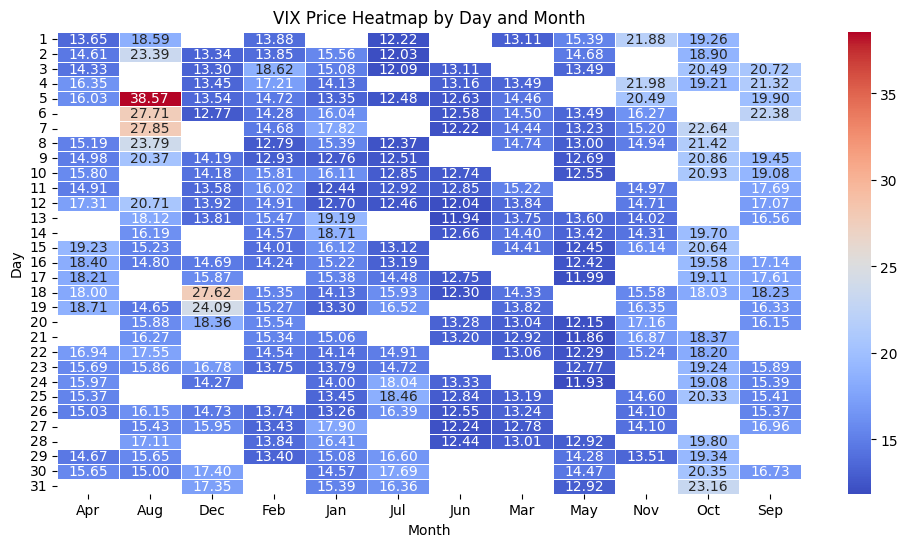

In [9]:
import pandas as pd
import requests
from io import BytesIO
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt # import pyplot

# GitHub raw file URL (replace with the actual link to your .xlsx file)
github_url = "https://github.com/stefanciprian/rd/blob/main/assets/VIX.xlsx"

# Modified URL to access the raw content
raw_github_url = github_url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")

# Fetch the content from GitHub
response = requests.get(raw_github_url)
if response.status_code == 200:
    excel_data = BytesIO(response.content)

    # Read the Excel file, explicitly specifying the engine
    df = pd.read_excel(excel_data, sheet_name=None, engine='openpyxl')  # Reads all sheets into a dictionary of DataFrames
    print("Successfully read the Excel file.")

    # Print available sheet names
    print("Available sheets:", df.keys())

    # Display the first few rows of the first sheet
    first_sheet = list(df.keys())[0]
    print(df[first_sheet].head())

    # Access the first sheet's DataFrame (replace 'Sheet1' with the actual sheet name if different)
    first_sheet_df = df[first_sheet]

    # Convert Date to datetime within the first sheet's DataFrame
    first_sheet_df["Date"] = pd.to_datetime(first_sheet_df["Date"])

    # Extract month and day for the heatmap
    first_sheet_df["Month"] = first_sheet_df["Date"].dt.strftime("%b")  # Month abbreviation
    first_sheet_df["Day"] = first_sheet_df["Date"].dt.day

    # Create pivot table for heatmap
    pivot_table = first_sheet_df.pivot_table(index="Day", columns="Month", values="Close")

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
    plt.title("VIX Price Heatmap by Day and Month")
    plt.xlabel("Month")
    plt.ylabel("Day")
    plt.show()
else:
    print("Failed to download the file. Status code:", response.status_code)

# Secțiune nouă

In [2]:
!pip install arch
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt
import yfinance as yf

# Load historical data (VIX and S&P 500)
vix_data = yf.download("^VIX", start="2000-01-01", end="2024-01-01")['Adj Close']
sp500_data = yf.download("^GSPC", start="2000-01-01", end="2024-01-01")['Adj Close']

# Compute daily returns
sp500_returns = sp500_data.pct_change().dropna()

# Compute realized volatility (20-day rolling standard deviation of returns)
realized_vol = sp500_returns.rolling(window=20).std() * np.sqrt(252)

# Compute volatility forecasts
sma_vol = sp500_returns.rolling(window=20).std() * np.sqrt(252)
ewma_vol = sp500_returns.ewm(span=20).std() * np.sqrt(252)

# GARCH(1,1) model estimation
garch_model = arch_model(sp500_returns.dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
garch_vol = garch_fit.conditional_volatility * np.sqrt(252)

# Align data for regression analysis
df = pd.DataFrame({
    'Realized_Vol': realized_vol,
    'VIX': vix_data.shift(1),  # Lagged VIX
    'SMA': sma_vol.shift(1),
    'EWMA': ewma_vol.shift(1),
    'GARCH': garch_vol.shift(1)
}).dropna()

# Regression: Testing forecasting power of VIX and other models
X = df[['VIX', 'SMA', 'EWMA', 'GARCH']]
X = sm.add_constant(X)  # Add constant term
y = df['Realized_Vol']

model = sm.OLS(y, X).fit()
print(model.summary())

# Value-at-Risk (VaR) calculation (95% confidence)
var_95 = -sp500_returns.rolling(252).quantile(0.05)

# Compare VIX-based VaR vs. other models
df['VaR_VIX'] = -df['VIX'] * 1.645 / np.sqrt(252)
df['VaR_GARCH'] = -df['GARCH'] * 1.645 / np.sqrt(252)
df['VaR_EWMA'] = -df['EWMA'] * 1.645 / np.sqrt(252)

# Plot Realized vs. Forecasted Volatility
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Realized_Vol'], label="Realized Volatility", color='black')
plt.plot(df.index, df['VIX'], label="VIX Forecast", color='blue')
plt.plot(df.index, df['GARCH'], label="GARCH Forecast", color='red')
plt.plot(df.index, df['EWMA'], label="EWMA Forecast", color='green')
plt.legend()
plt.title("Comparison of Realized vs. Forecasted Volatility")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.4 MB/s eta 0:00:00
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'